## TSP Visualizer

In [89]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [90]:
prob_id = 'd18512'

PRJ_DIR = os.path.join('/home', 'jovyan', 'work')
input_file = os.path.join(PRJ_DIR, '01_testset', 'tsplib', '01_euc_2d', prob_id + '.in')

#result_file = os.path.join(PRJ_DIR, 'result', 'result_NN.csv')
result_file = os.path.join(PRJ_DIR, 'result', 'result_Kruskal.csv')

In [91]:
# 入力ファイルの読み込み
xy_list = []

with open(input_file, 'r') as f:
    lines = f.readlines()

    N = int(lines[0].strip())
    lines.pop(0)

    for i in range(N):
        x, y = map(float, lines[i].strip().split())

        xy_list.append((x, y))

In [92]:
# 出力の読み込み
result_df = pd.read_csv(result_file)
prob_df = result_df.query('name == "{}"'.format(prob_id))

In [93]:
tour = prob_df['tour'].to_list()[0].split('-')[:-1]
tour = list(map(int, tour))

tour = [v-1 for v in tour]

In [94]:
# 色を決定する関数
def get_color(i, n):
    r = i / n
    b = 1 - r
    return (r, 0, b)

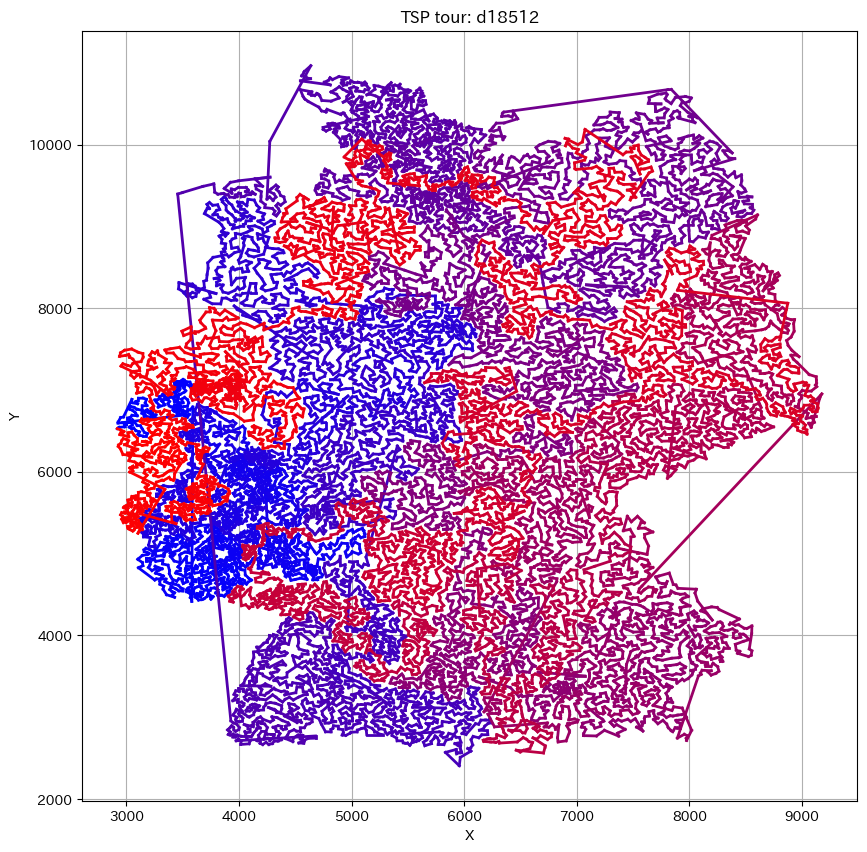

In [96]:
# プロットの設定
plt.figure(figsize=(10, 10))

# 各エッジを順番にプロット
for i in range(len(tour)):
    start = xy_list[tour[i]]
    end = xy_list[tour[(i + 1) % len(tour)]]
    
    plt.plot([start[0], end[0]], [start[1], end[1]], color=get_color(i, len(tour) - 1), linewidth=2)

# プロットの表示
plt.title("TSP tour: {}".format(prob_id))
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()